In [ ]:
import numpy as np
#import pickle
import pickle5 as pickle
import matplotlib.pyplot as plt

In [12]:
with open('results/ds1long_filename.pickle', 'rb') as handle:
    b = pickle.load(handle)


[]

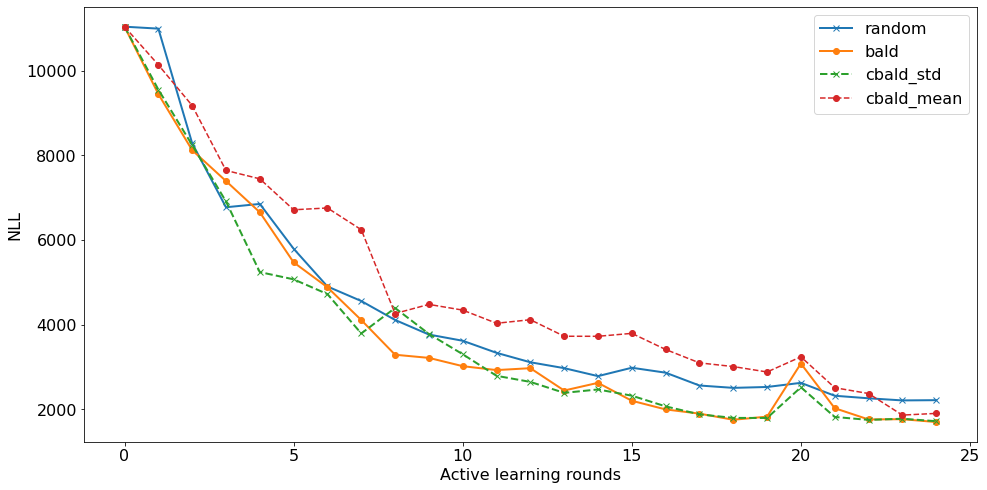

In [14]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 16})
plt.plot(np.mean(b['random'], axis=0),'-x', label='random', linewidth=2)
plt.plot(np.mean(b['bald'], axis=0),'-o', label = 'bald', linewidth=2)
plt.plot(np.mean(b['cbald'], axis=0),'--x', label = 'cbald_std', linewidth=2)
plt.plot(np.mean(b['tau'], axis=0), '--o',label='cbald_mean')


#plt.fill_between(np.arange(b['random'].shape[-1]), y1 = np.mean(b['random'], axis=0)-np.std(b['random'], axis=0),
#                                                    y2 = np.mean(b['random'], axis=0)+np.std(b['random'], axis=0),alpha=0.25)
#plt.fill_between(np.arange(b['bald'].shape[-1]), y1 = np.mean(b['bald'], axis=0)-np.std(b['bald'], axis=0),
#                                                    y2 = np.mean(b['bald'], axis=0)+np.std(b['bald'], axis=0),alpha=0.25)
#plt.fill_between(np.arange(b['cbald'].shape[-1]), y1 = np.mean(b['cbald'], axis=0)-np.std(b['cbald'], axis=0),
#                                                    y2 = np.mean(b['cbald'], axis=0)+np.std(b['cbald'], axis=0),alpha=0.25)

#plt.fill_between(np.arange(b['tau'].shape[-1]), y1 = np.mean(b['tau'], axis=0)-np.std(b['tau'], axis=0),
#                                                    y2 = np.mean(b['tau'], axis=0)+np.std(b['tau'], axis=0),alpha=0.25)

#plt.plot(np.mean(b['pi'], axis=0), label='pi')
#plt.plot(np.mean(b['mupi'], axis=0), label='mupi')
#plt.plot(np.mean(b['mu'], axis=0), label='mu')
#plt.plot(np.mean(b['murho'], axis=0), label='murho')
#plt.plot(np.mean(b['rho'], axis=0), label='rho')
#plt.plot(np.mean(b['mutatu'], axis=0), label='mtau')
plt.legend(loc='upper right')
#plt.xlim(4,None)
#plt.ylim(2000,None)
plt.xlabel("Active learning rounds")
plt.ylabel("NLL")
plt.plot()#

In [18]:
print(np.sum(np.mean(b['random'], axis=0)))
print(np.sum(np.mean(b['bald'], axis=0)))
print(np.sum(np.mean(b['cbald'], axis=0)))
print(np.sum(np.mean(b['tau'], axis=0)))

107949.58744303386
97601.89318847656
95776.99686686198
121898.63114420573


In [13]:
with open('results/sklearn_censored_filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

[]

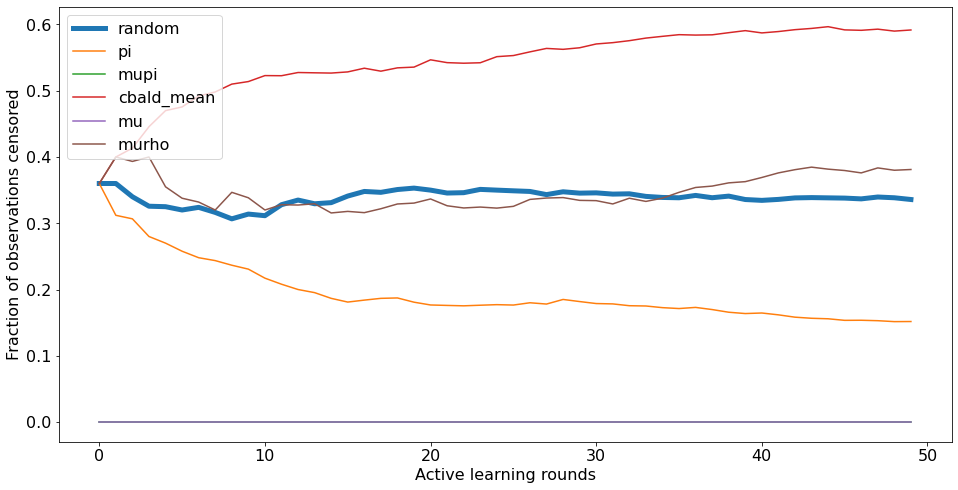

In [15]:
plt.figure(figsize=(16,8))
plt.plot(np.mean(b['random'], axis=0), label='random', linewidth=5)
#plt.plot(np.mean(b['bald'], axis=0), label = 'bald', linewidth=2)
#plt.plot(np.mean(b['cbald'], axis=0), label = 'cbald_std', linewidth=2)
plt.plot(np.mean(b['pi'], axis=0), label='pi')
plt.plot(np.mean(b['mupi'], axis=0), label='mupi')
plt.plot(np.mean(b['tau'], axis=0), label='cbald_mean')
plt.plot(np.mean(b['mu'], axis=0), label='mu')
plt.plot(np.mean(b['mutatu'], axis=0), label='murho')
#plt.plot(np.mean(b['rho'], axis=0), label='rho')
#plt.hlines(y=0.33, xmin=0, xmax=25, color='black', label='% of censoring')
#plt.fill_between(np.arange(b['random'].shape[-1]), y1 = np.mean(b['random'], axis=0)-np.std(b['random'], axis=0),
#                                                    y2 = np.mean(b['random'], axis=0)+np.std(b['random'], axis=0),alpha=0.25)
plt.legend(loc='upper left')
#plt.xlim(4,None)
#plt.ylim(2000,None)
plt.xlabel("Active learning rounds")
plt.ylabel("Fraction of observations censored")
plt.plot()